# Colab에서 한글 폰트 사용하기

## Step 1. 한글 폰트 설치

In [5]:
# Jupyter notebook 환경에서 리눅스 명령어 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,912 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## Step2. colab runtime 재시작(ctrl + M)

## Step 3. matplotlib 패키지에서 한글 폰트를 사용할 수 있도록 설정

In [1]:
import matplotlib.pyplot as plt

# pyplot에서 나눔바른고딕 폰트를 사용하도록 설정
plt.rc('font', family='NanumBarunGothic')

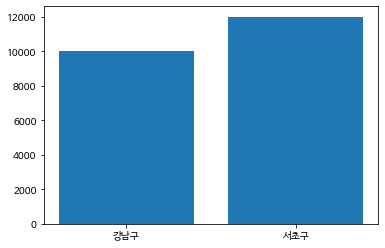

In [2]:
# 한글 폰트 테스트
import pandas as pd

df = pd.DataFrame({'gu': ['강남구', '서초구'],
                   'price': [10_000, 12_000]})

plt.bar(x=df['gu'], height=df['price'])
plt.show()

#아파트 매매가 분석 Exercise


*   [apt_201910.csv](https://github.com/JakeOh/202205_itw_bd34/raw/main/datasets/apt_201910.csv) 파일을 읽고 DataFrame 생성
    *   encoding 파라미터 설정
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력


## 라이브러리 import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터셋 준비

In [5]:
apt_data ='https://raw.githubusercontent.com/JakeOh/202205_itw_bd34/main/datasets/apt_201910.csv'

In [6]:
apt = pd.read_csv(apt_data, engine='python', sep=',',
                  encoding='CP949', thousands=',')
# 천 단위 자리수 구분 기호 콤마(',' comma)를 없애는 방법 = thousands=','
# encoding: 파일에서 사용된 문자열 셋의 종류. 기본값은 'utf-8', 
# 한글 MS-Window의 기본 텍스트 인코딩은 'MS949', 'CP949'. 한글이 깨져서 보이는것을 해결할 수 있음
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22
...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32


In [ ]:
# 가격의 ',' 를 직접 int타입으로 바꾸기
# apt['가격'].str.replace(',','').astype('int')

## 데이터 요약정보(info, head, describe,...)

In [7]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [8]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [9]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


In [10]:
apt.describe() # 숫자타입의 기술통계량

,부번,면적,계약년월,계약일,가격,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,31719.163946,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,26001.893045,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,600.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,15500.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,25400.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,40000.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,485000.000000,70.000000,2019.000000


In [ ]:
apt.면적.value_counts()

84.9900     657
59.9900     538
84.9600     531
84.9800     528
84.9700     458
           ... 
76.5319       1
81.2800       1
19.4177       1
114.9240      1
76.4300       1
Name: 면적, Length: 10656, dtype: int64

In [ ]:
apt.건축년도.value_counts()

## 아파트 가격 분포 시각화 확인

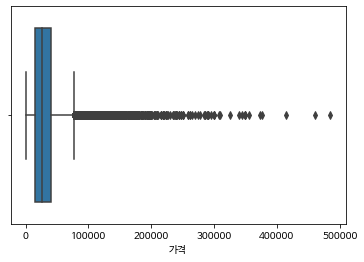

In [18]:
sns.boxplot(x='가격', data=apt)
plt.show()

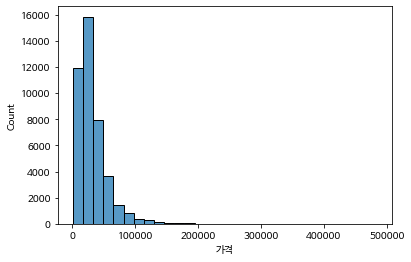

In [12]:
sns.histplot(x='가격',data=apt, bins=30)
plt.show()

## 아파트 면적 분포 시각화 확인

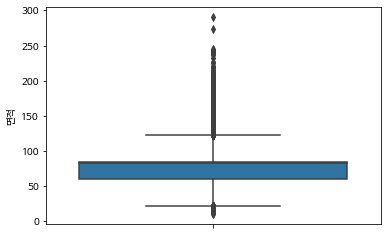

In [13]:
sns.boxplot(y='면적', data=apt)
plt.show()

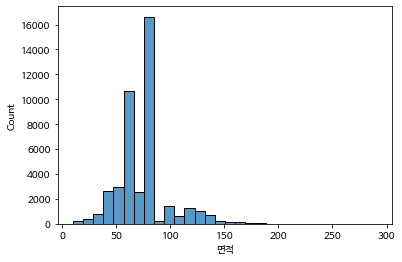

In [21]:
sns.histplot(x='면적',data=apt, bins=30)
plt.show()

## 파생변수 추가

### 광역시도 파생변수

In [28]:
# df ['new_name'] = Series #파생변수
apt['province'] = apt['시군구'].str.split().str[0] #> 문자열(강원도,충청북도 글자수가 다르므로 split 사용)
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,county,dong,province
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강릉시,견소동,강원도
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강릉시,견소동,강원도
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강릉시,견소동,강원도
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강릉시,견소동,강원도
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강릉시,견소동,강원도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28,충주시,호암동,충청북도
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32,충주시,호암동,충청북도
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32,충주시,호암동,충청북도
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32,충주시,호암동,충청북도


In [29]:
# value_count()의 결과인 Series를 인덱스 오름차순으로 정렬(ㄱㄴㄷㄹ..)
apt.province.value_counts().sort_index()

강원도         1143
경기도        12126
경상남도        2955
경상북도        1985
광주광역시       1588
대구광역시       1969
대전광역시       2487
부산광역시       2752
서울특별시       4701
세종특별자치시      315
울산광역시       1562
인천광역시       2761
전라남도        1234
전라북도        1394
제주특별자치도      165
충청남도        2045
충청북도        1576
Name: province, dtype: int64

### 시군구(변수이름 시군구 X) 파생변수

In [22]:
apt['county'] = apt.시군구.str.split().str[1]
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,county
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강릉시
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강릉시
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강릉시
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강릉시
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28,충주시
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32,충주시
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32,충주시
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32,충주시


In [23]:
apt['county'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양덕양구', '고양일산동구', '고양일산서구', '과천시', '광명시', '광주시', '구리시',
       '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남분당구', '성남수정구', '성남중원구',
       '수원권선구', '수원영통구', '수원장안구', '수원팔달구', '시흥시', '안산단원구', '안산상록구', '안성시',
       '안양동안구', '안양만안구', '양주시', '양평군', '여주시', '연천군', '오산시', '용인기흥구',
       '용인수지구', '용인처인구', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시',
       '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시',
       '의령군', '진주시', '창녕군', '창원마산합포구', '창원마산회원구', '창원성산구', '창원의창구',
       '창원진해구', '통영시', '하동군', '함안군', '함양군', '합천군', '경산시', '경주시', '고령군',
       '구미시', '군위군', '김천시', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군',
       '포항남구', '포항북구', '광산구', '남구', '동구', '북구', '서구', '달서구', '달성군', '수성구',
       '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구',
    

In [26]:
apt['dong'] = apt.시군구.str.split().str[2]
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,county,dong
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강릉시,견소동
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강릉시,견소동
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강릉시,견소동
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강릉시,견소동
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강릉시,견소동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28,충주시,호암동
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32,충주시,호암동
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32,충주시,호암동
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32,충주시,호암동


### 계약연도/월 파생변수

In [30]:
# 계약년월 파생변수
apt['year'] = apt['계약년월'] // 100 #> 201910 // 100 = 2019 몫
apt['month'] = apt['계약년월'] % 100 #> 201910 % 100 = 10 나머지
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,county,dong,province,year,month
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강릉시,견소동,강원도,2019,10
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강릉시,견소동,강원도,2019,10
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강릉시,견소동,강원도,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강릉시,견소동,강원도,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강릉시,견소동,강원도,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28,충주시,호암동,충청북도,2019,10
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32,충주시,호암동,충청북도,2019,10
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32,충주시,호암동,충청북도,2019,10
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32,충주시,호암동,충청북도,2019,10


### 서울 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값

In [31]:
# 서울특별시 데이터
seoul_apt = apt[apt['province']=='서울특별시']
seoul_apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,county,dong,province,year,month
27005,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,41.98,201910,1,180000,4,1982,개포로 310,강남구,개포동,서울특별시,2019,10
27006,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,35.64,201910,2,153000,2,1982,개포로 310,강남구,개포동,서울특별시,2019,10
27007,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,3,205000,4,1982,개포로 310,강남구,개포동,서울특별시,2019,10
27008,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,4,207000,2,1982,개포로 310,강남구,개포동,서울특별시,2019,10
27009,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201910,12,270000,5,1982,개포로 310,강남구,개포동,서울특별시,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,서울특별시 중랑구 중화동,42,42,0,중화동건영아파트,59.94,201910,12,27000,12,1998,동일로140길 88,중랑구,중화동,서울특별시,2019,10
31702,서울특별시 중랑구 중화동,19-16,19,16,한솔e(A동),71.34,201910,3,34000,3,2004,봉화산로27길 30,중랑구,중화동,서울특별시,2019,10
31703,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,12,45500,25,1997,동일로 752,중랑구,중화동,서울특별시,2019,10
31704,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,16,45700,24,1997,동일로 752,중랑구,중화동,서울특별시,2019,10


In [ ]:
# # startswith()로 문자열이 특정 문자열로 시작하는지 확인
# seoul_apt = apt[apt['province'].str.startswith('서울')]
# seoul_apt

In [32]:
seoul_apt.가격.describe()

count      4701.000000
mean      69302.919166
std       42599.162101
min        8500.000000
25%       41500.000000
50%       60000.000000
75%       84500.000000
max      485000.000000
Name: 가격, dtype: float64

### 서울시 동별 통계

In [37]:
# 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
result_seoul_dong=seoul_apt.groupby('dong')['가격'].agg(['count','mean','min','max'])
result_seoul_dong
#aggregate(집계) 함수는 groupby로 묶어놓은 자료형에 다양한 집계함수를 적용할 수 있다.

,count,mean,min,max
dong,,,,
가락동,22,78695.454545,16000,110000
가산동,6,40550.000000,20300,53500
가양동,43,49988.372093,33500,114000
갈현동,5,38400.000000,27000,60000
강일동,19,67026.315789,58500,85000
...,...,...,...,...
회현동1가,3,125500.000000,113000,143500
효창동,6,87500.000000,59000,130000
후암동,3,78066.666667,30200,129000


### 아파트 거래건수 상위 10개지역

In [39]:
#서울 거래 건수 상위 10개 지역
top_10 = result_seoul_dong.sort_values(by='count', ascending=False).head(n=10)
top_10
#ascending = False 내림차순 (오름차순은 기본값)

,count,mean,min,max
dong,,,,
상계동,198,40474.242424,23200,78000
구로동,120,47075.250000,9800,118000
중계동,108,46145.740741,16300,97000
시흥동,101,39634.435644,9000,86000
봉천동,97,56228.340206,13000,89900
신월동,78,41164.102564,17500,79000
공릉동,78,37887.179487,8500,71500
신정동,77,74342.207792,29950,176000
창동,76,44913.815789,18700,88000


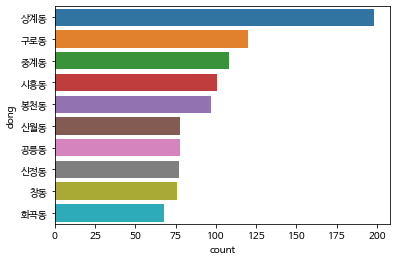

In [40]:
sns.barplot(x='count', y=top_10.index, data=top_10)
plt.show()

### 아파트 거래 가격의 평균 상위 10개 지역

In [43]:
#서울 가격 평균값 상위 10개 지역
mean_10 = result_seoul_dong.sort_values(by='mean', ascending=False).head(n=10)
mean_10

,count,mean,min,max
dong,,,,
압구정동,10,263250.000000,170000,355000
반포동,17,224200.000000,87700,415000
잠원동,15,194313.333333,109000,295000
대치동,22,192795.454545,30000,373000
잠실동,22,191459.090909,145000,308000
홍파동,2,176500.000000,159000,194000
한강로3가,1,175000.000000,175000,175000
여의도동,8,172562.500000,105000,259000
청담동,10,170200.000000,75000,300000


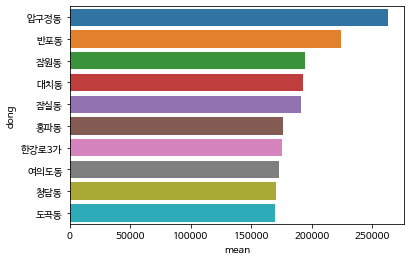

In [48]:
sns.barplot(x='mean', y=mean_10.index, data=mean_10)
plt.show()

### 거래건수가 10건 이상인 지역(동)에서 거래 가격 평균 상위 10개 지역

In [52]:
mean_top10= \
result_seoul_dong[result_seoul_dong['count']>=10].sort_values(by='mean', ascending=False).head(10)
mean_top10

,count,mean,min,max
dong,,,,
압구정동,10,263250.000000,170000,355000
반포동,17,224200.000000,87700,415000
잠원동,15,194313.333333,109000,295000
대치동,22,192795.454545,30000,373000
잠실동,22,191459.090909,145000,308000
청담동,10,170200.000000,75000,300000
도곡동,23,169347.826087,31800,461000
신천동,11,154681.818182,82000,227500
방배동,31,142812.903226,57000,250000


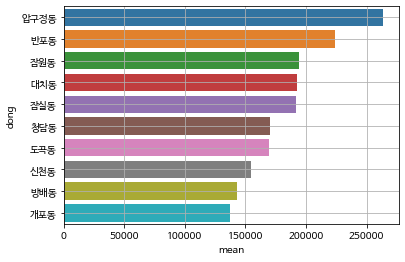

In [54]:
sns.barplot(x='mean', y=mean_top10.index, data=mean_top10)
plt.grid()
plt.show()

### 서울 아파트 가격 최댓값 상위 10개 지역(동)

In [56]:
#서울 아파트 가격 최댓값 상위 10개 지역
max_10 = result_seoul_dong.sort_values(by='max',ascending=False).head(n=10)
max_10

,count,mean,min,max
dong,,,,
한남동,6,159666.666667,27000,485000
도곡동,23,169347.826087,31800,461000
반포동,17,224200.000000,87700,415000
대치동,22,192795.454545,30000,373000
압구정동,10,263250.000000,170000,355000
잠실동,22,191459.090909,145000,308000
청담동,10,170200.000000,75000,300000
잠원동,15,194313.333333,109000,295000
삼성동,7,168714.285714,103000,290000


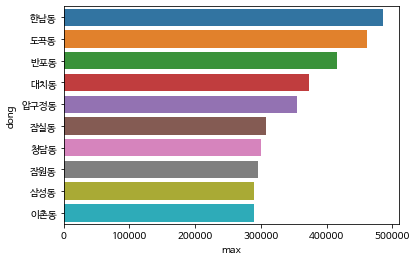

In [57]:
sns.barplot(x='max',y=max_10.index, data=max_10)
plt.show()

서울 구별 아파트 거래 건수, 거래가격평균, 최솟값, 중앙값, 최댓값

##전국 도/광역시별 개수,평균,최솟값,최댓값

In [59]:
# 도/광역시별 아파트 중에서, 가격별 개수, 평균, 최솟값, 최댓값
total_apt = apt.groupby('province')['가격'].agg(['count','mean','max','min'])
total_apt

,count,mean,max,min
province,,,,
강원도,1143,14305.559930,45800,950
경기도,12126,36447.593765,262000,2700
경상남도,2955,20157.054484,83200,2700
경상북도,1985,15304.175819,50000,600
광주광역시,1588,21786.904282,115000,4150
대구광역시,1969,28031.251397,173500,1500
대전광역시,2487,27591.418979,150000,2400
부산광역시,2752,29593.587209,376640,1500
서울특별시,4701,69302.919166,485000,8500


### 거래 건수 상위 5개 광역시도

In [61]:
count5 = total_apt.sort_values(by='count', ascending=False).head(n=5)
count5

,count,mean,max,min
province,,,,
경기도,12126,36447.593765,262000,2700
서울특별시,4701,69302.919166,485000,8500
경상남도,2955,20157.054484,83200,2700
인천광역시,2761,30196.960884,300000,4000
부산광역시,2752,29593.587209,376640,1500


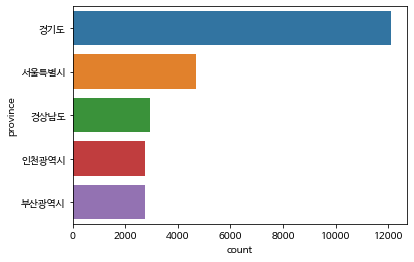

In [62]:
sns.barplot(x='count', y=count5.index, data=count5)
plt.show()

### 거래 가격 평균 상위 5개 광역시도

In [63]:
mean5 = total_apt.sort_values(by='mean', ascending=False).head() # head() default 값은 5
mean5

,count,mean,max,min
province,,,,
서울특별시,4701,69302.919166,485000,8500
경기도,12126,36447.593765,262000,2700
세종특별자치시,315,33577.206349,82200,2880
인천광역시,2761,30196.960884,300000,4000
부산광역시,2752,29593.587209,376640,1500


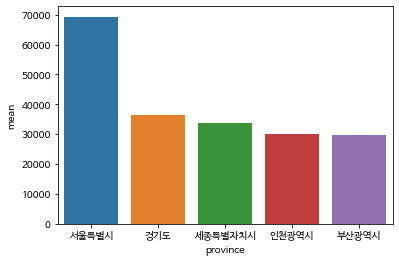

In [66]:
sns.barplot(y='mean', x=mean5.index,data=mean5)
plt.show()

In [67]:
# 광역시도 거래 최소값 상위 5개 지역
total_apt.sort_values(by='min').head(5)

,count,mean,max,min
province,,,,
경상북도,1985,15304.175819,50000,600
전라북도,1394,14655.274032,68700,900
강원도,1143,14305.559930,45800,950
충청북도,1576,18068.494289,96000,1100
전라남도,1234,14523.552674,61800,1330


## 서울특별시 면적별 아파트(면적이  84𝑚2  이상  100𝑚2  미만)

In [68]:
# 면적이  84𝑚2  이상  100𝑚2  미만의 서울 아파트
seoul_part = seoul_apt[(seoul_apt['면적'] >= 84) & (seoul_apt['면적']<100)]
seoul_part

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,county,dong,province,year,month
27027,서울특별시 강남구 논현동,80-13,80,13,프라임,97.8000,201910,1,93000,4,2004,도산대로30길 56,강남구,논현동,서울특별시,2019,10
27030,서울특별시 강남구 대치동,1014-3,1014,3,대치삼성,84.5800,201910,17,190000,3,2000,도곡로78길 22,강남구,대치동,서울특별시,2019,10
27033,서울특별시 강남구 대치동,988-4,988,4,대치효성,84.9100,201910,6,159000,5,1999,삼성로64길 12,강남구,대치동,서울특별시,2019,10
27037,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,84.9700,201910,14,277000,35,2015,삼성로51길 37,강남구,대치동,서울특별시,2019,10
27038,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,91.9300,201910,20,275000,23,2015,삼성로51길 35,강남구,대치동,서울특별시,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31691,서울특별시 중랑구 신내동,801,801,0,영풍마드레빌,84.8485,201910,12,55500,6,2004,용마산로129가길 41,중랑구,신내동,서울특별시,2019,10
31692,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,41000,1,1996,봉화산로56길 123,중랑구,신내동,서울특별시,2019,10
31693,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,43000,5,1996,봉화산로56길 145-1,중랑구,신내동,서울특별시,2019,10
31694,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,11,44300,9,1996,봉화산로56길 123,중랑구,신내동,서울특별시,2019,10


In [69]:
# 서울특별시 84이상 100미만 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
seoul_84 = seoul_part.groupby('dong')['가격'].agg(['count','mean','max','min'])
seoul_84

,count,mean,max,min
dong,,,,
가락동,7,85485.714286,107000,77000
가산동,2,52500.000000,53500,51500
가양동,4,76100.000000,95000,59000
강일동,15,66980.000000,70500,62000
개봉동,12,55966.666667,70000,43000
...,...,...,...,...
황학동,8,77562.500000,79800,75000
회기동,1,78500.000000,78500,78500
효창동,4,95500.000000,130000,66000


In [71]:
# 서울특별시 84이상 100미만 아파트들 중에서, 동별 아파트 가격 거래 건수 상위 5개 
seoul_84.sort_values(by='count', ascending=False).head()

,count,mean,max,min
dong,,,,
구로동,35,60861.428571,87000,37500
봉천동,31,65812.903226,80500,48000
상도동,29,94348.275862,120000,44000
목동,26,99382.692308,160000,46650
중계동,24,63502.083333,90000,44000


In [77]:
# 결과를 평균의 내림차순으로 정렬해서 출력
seoul_84.sort_values(by='mean', ascending=False).head(n=5)

,count,mean,max,min
dong,,,,
반포동,6,244833.333333,340000,130000
대치동,8,207000.000000,277000,137000
잠원동,8,195275.000000,285000,109000
삼성동,2,188500.000000,259000,118000
서빙고동,1,183000.000000,183000,183000


In [74]:
# 결과를 최댓값의 내림차순으로 정렬해서 출력
view = seoul_84.sort_values(by='max', ascending=False).head().reset_index()
view

,dong,count,mean,max,min
0,반포동,6,244833.333333,340000,130000
1,잠원동,8,195275.000000,285000,109000
2,대치동,8,207000.000000,277000,137000
3,삼성동,2,188500.000000,259000,118000
4,잠실동,8,181500.000000,195000,167000


In [ ]:
# import warnings
# warnings.filterwarnings("ignore") # 경고메세지 무시

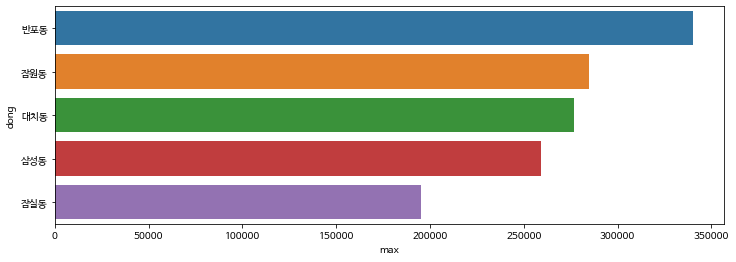

In [75]:
plt.figure(figsize=(12,4))
sns.barplot(x='max', y='dong', data=view)
plt.show()

In [79]:
# 결과를 최솟값의 오름차순으로 정렬해서 출력
seoul_84.sort_values(by='min').head()

,count,mean,max,min
dong,,,,
신월동,23,50171.739130,79000,27500
상계동,11,47527.272727,71800,28000
홍은동,12,57275.000000,92000,28500
역촌동,4,49200.000000,57000,29500
쌍문동,14,38142.857143,50000,30000


## 도/광역시별 면적별 아파트(면적이  84𝑚2  이상  100𝑚2  미만)

In [84]:
# 면적이  84𝑚2  이상  100𝑚2  미만의 전국 아파트
apt_part = apt[(apt['면적']>=84)&(apt['면적']<100)]
apt_part

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,county,dong,province,year,month
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,5,25000,6,2005,경강로2539번길 22,강릉시,견소동,강원도,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,12,20600,3,2005,경강로2539번길 22,강릉시,견소동,강원도,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,20,20500,1,2005,경강로2539번길 22,강릉시,견소동,강원도,2019,10
5,강원도 강릉시 교동,1984,1984,0,강릉 교동 풍림아이원 아파트,84.9964,201910,5,29200,14,2017,화부산로40번길 29,강릉시,교동,강원도,2019,10
9,강원도 강릉시 교동,1750,1750,0,교동1주공,84.8400,201910,18,21550,9,1999,가작로 78,강릉시,교동,강원도,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42752,충청북도 충주시 호암동,547-6,547,6,호반현대,84.9600,201910,26,9050,1,1994,신촌2길 29,충주시,호암동,충청북도,2019,10
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,5,12000,15,2002,원호암5길 32,충주시,호암동,충청북도,2019,10
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,15,11000,7,2002,원호암5길 32,충주시,호암동,충청북도,2019,10
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,17,12000,14,2002,원호암5길 32,충주시,호암동,충청북도,2019,10


In [89]:
# 도/광역시별 84이상 100미만 아파트들 중에서, 아파트 가격 개수, 평균, 최솟값, 최댓값
apt_84 = apt_part.groupby('province')['가격'].agg(['count','mean','max','min'])
apt_84

,count,mean,max,min
province,,,,
강원도,393,19480.854962,45800,5200
경기도,4659,39507.718395,165000,7000
경상남도,1171,24684.422716,69400,5800
경상북도,731,20489.586867,47250,4500
광주광역시,612,28226.101307,70500,11500
대구광역시,758,33837.645119,91000,11800
대전광역시,1066,30905.909944,89500,7500
부산광역시,886,36020.182844,85000,9800
서울특별시,1511,79348.775645,340000,27500


In [91]:
# 도/광역시별 84이상 100미만 아파트들 중에서, 아파트 가격 거래건수 상위 5개 
apt_84.sort_values(by='count', ascending=False).head()

,count,mean,max,min
province,,,,
경기도,4659,39507.718395,165000,7000
서울특별시,1511,79348.775645,340000,27500
경상남도,1171,24684.422716,69400,5800
대전광역시,1066,30905.909944,89500,7500
인천광역시,922,34813.131236,85500,10100


In [92]:
# # 도/광역시별 84이상 100미만 아파트들 중에서, 아파트 평균가격 상위 5개 
apt_84.sort_values(by='mean',ascending=False).head(n=10)

,count,mean,max,min
province,,,,
서울특별시,1511,79348.775645,340000,27500
경기도,4659,39507.718395,165000,7000
세종특별자치시,156,38979.487179,74000,10000
부산광역시,886,36020.182844,85000,9800
인천광역시,922,34813.131236,85500,10100
대구광역시,758,33837.645119,91000,11800
제주특별자치도,56,33226.785714,75000,15800
울산광역시,657,31650.003044,65000,9000
대전광역시,1066,30905.909944,89500,7500


In [93]:
# 결과를 최댓값의 내림차순으로 정렬해서 출력
view2 = apt_84.sort_values(by='max',ascending=False).head().reset_index()
view2

,province,count,mean,max,min
0,서울특별시,1511,79348.775645,340000,27500
1,경기도,4659,39507.718395,165000,7000
2,대구광역시,758,33837.645119,91000,11800
3,대전광역시,1066,30905.909944,89500,7500
4,인천광역시,922,34813.131236,85500,10100


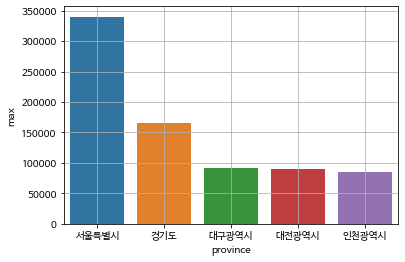

In [97]:
sns.barplot(x='province',y='max',data=view2)
plt.grid()
plt.show()

In [98]:
# 결과를 최솟값의 오름차순으로 정렬해서 출력
apt_84.sort_values(by='min',ascending=False).head()

,count,mean,max,min
province,,,,
서울특별시,1511,79348.775645,340000,27500
제주특별자치도,56,33226.785714,75000,15800
대구광역시,758,33837.645119,91000,11800
광주광역시,612,28226.101307,70500,11500
인천광역시,922,34813.131236,85500,10100


In [103]:
seoul_apt[seoul_apt['가격']==seoul_apt['가격'].max()]

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,county,dong,province,year,month
31258,서울특별시 용산구 한남동,810,810,0,한남더힐,233.062,201910,24,485000,4,2011,독서당로 111,용산구,한남동,서울특별시,2019,10


In [135]:
dong_price = seoul_apt.groupby('dong')['가격'].max().reset_index()
dong_price

,dong,가격
0,가락동,110000
1,가산동,53500
2,가양동,114000
3,갈현동,60000
4,강일동,85000
...,...,...
242,회현동1가,143500
243,효창동,130000
244,후암동,129000
245,휘경동,81500


In [ ]:
for dong,price in zip(dong_price.index, dong_price.values):
    print(seoul_apt[(seoul_apt['dong']== dong)&(seoul_apt['가격']==price)]['단지명'])

In [136]:
result = pd.merge(seoul_apt, dong_price.reset_index(), on=['dong','가격']) #on = 기준열

In [142]:
result
#dong_price는 247

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,county,dong,province,year,month,index
0,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.6400,201910,12,270000,5,1982,개포로 310,강남구,개포동,서울특별시,2019,10,6
1,서울특별시 강남구 논현동,268-12,268,12,그랑디오스,132.9600,201910,4,158000,5,2004,봉은사로51길 18,강남구,논현동,서울특별시,2019,10,33
2,서울특별시 강남구 대치동,670,670,0,동부센트레빌,161.4700,201910,29,373000,3,2005,선릉로 206,강남구,대치동,서울특별시,2019,10,46
3,서울특별시 강남구 도곡동,202,202,0,상지리츠빌 카일룸,210.5000,201910,24,461000,2,2018,남부순환로373길 23,강남구,도곡동,서울특별시,2019,10,49
4,서울특별시 강남구 삼성동,Feb-53,53,2,진흥아파트,170.0100,201910,8,290000,8,1984,학동로88길 5,강남구,삼성동,서울특별시,2019,10,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,서울특별시 중랑구 면목동,1537,1537,0,용마산하늘채,84.6147,201910,6,74300,7,2015,용마산로 210,중랑구,면목동,서울특별시,2019,10,68
245,서울특별시 중랑구 묵동,20,20,0,신내두산,126.2800,201910,7,73200,7,1995,신내로21길 16,중랑구,묵동,서울특별시,2019,10,75
246,서울특별시 중랑구 상봉동,501,501,0,상봉 듀오트리스,131.8000,201910,3,91000,28,2016,상봉로 131,중랑구,상봉동,서울특별시,2019,10,104
247,서울특별시 중랑구 신내동,816,816,0,신내우디안1단지,101.6500,201910,9,66900,10,2014,신내역로1길 85,중랑구,신내동,서울특별시,2019,10,130


In [138]:
result.dong.value_counts()
#홍제동과 상도동의 가격이 같은 아파트가 2개

홍제동      2
상도동      2
개포동      1
당산동6가    1
잠실동      1
        ..
상수동      1
상암동      1
서교동      1
성산동      1
중화동      1
Name: dong, Length: 247, dtype: int64